# SVM Model

In [2]:
# pip install shap

In [3]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score



In [4]:
# df_old = pd.read_csv('../../data/M2_final.csv') 
df = pd.read_csv('../imputed_dataset.csv')



In [5]:
df.head() 

,rating,ranking,year,position,height,weight,latitude,longitude,stars,committed_to,...,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group
0,0.9644,71.0,2012,DT,76.0,290.0,35.334011,-81.865103,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,71.511790,defense,d_line
1,0.9632,79.0,2012,WR,71.0,175.0,35.227200,-80.843083,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,119.438575,offense,pass_catcher
2,0.9567,92.0,2012,S,73.0,195.0,30.438083,-84.280933,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,304.721993,defense,d_backfield
3,0.9264,187.0,2012,DUAL,75.0,205.0,42.886717,-78.878392,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,605.799029,offense,qb
4,0.9133,231.0,2012,ATH,73.0,180.0,35.842865,-90.703452,4,Clemson,...,34.678774,-82.843243,16.0,27.0,0.0,128.0,0.846154,450.556207,athlete,athlete


In [6]:
df.columns 

Index(['rating', 'ranking', 'year', 'position', 'height', 'weight', 'latitude',
       'longitude', 'stars', 'committed_to', 'is_drafted', 'conference',
       'latitude_school', 'longitude_school', 'wins_rolling_2year',
       'games_played_rolling_2year', 'post_season_wins_rolling_2year',
       'point_diff_rolling_2year', 'win_pct_rolling_2year', 'distance_miles',
       'side_of_ball', 'position_group'],
      dtype='object')

In [7]:
## Unbalanced dataset 
df['is_drafted'].mean()

0.08514636488913016

In [8]:
df['is_drafted'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
23942    0.0
23943    0.0
23944    0.0
23945    0.0
23946    0.0
Name: is_drafted, Length: 23947, dtype: float64>

In [9]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_df = df[df['is_drafted'] == 0.0]
minority_df = df[df['is_drafted'] == 1.0]

# Perform undersampling of the majority class
majority_undersampled = resample(majority_df, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_df),  # to match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
balanced_data = pd.concat([majority_undersampled, minority_df])

In [10]:
numerical_features = ['rating', 'ranking', 'height', 'weight', 'distance_miles', 'stars', 'games_played_rolling_2year','win_pct_rolling_2year']
categorical_features = ['side_of_ball', 'position_group']
target = ['is_drafted']


In [11]:
# Separate features and target in the balanced dataset
X_balanced = balanced_data[numerical_features+categorical_features]
y_balanced = balanced_data[target]

# Encoding categorical features (if any)
X_balanced = pd.get_dummies(X_balanced) # Uncomment if you have categorical features



In [12]:
# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)


In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
## Hyperparameter tuning
# Define the kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

best_kernel = None
best_score = 0
results = []

# Evaluate each kernel
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='f1')
    mean_cv_score = cv_scores.mean()
    results.append((kernel, mean_cv_score))
    
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_kernel = kernel
        
print("Kernel performance:")
for kernel, score in results:
    print(f"Kernel: {kernel}, Cross-Validation Accuracy: {score:.4f}")


/Users/ASerban/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ASerban/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ASerban/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ASerban/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d

Kernel performance:
Kernel: linear, Cross-Validation Accuracy: 0.6760
Kernel: poly, Cross-Validation Accuracy: 0.6497
Kernel: rbf, Cross-Validation Accuracy: 0.6425
Kernel: sigmoid, Cross-Validation Accuracy: 0.5869


In [15]:
# Initialize the SVM model with the kernel of your choice (linear, poly, rbf etc.)
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

/Users/ASerban/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted') # You can change 'weighted' to 'micro' or 'macro' based on your needs

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'F1 Score: {f1}')


Accuracy: 0.6650326797385621
Confusion Matrix:
[[452 181]
 [229 362]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.71      0.69       633
         1.0       0.67      0.61      0.64       591

    accuracy                           0.67      1224
   macro avg       0.67      0.66      0.66      1224
weighted avg       0.67      0.67      0.66      1224

F1 Score: 0.6640615488542787


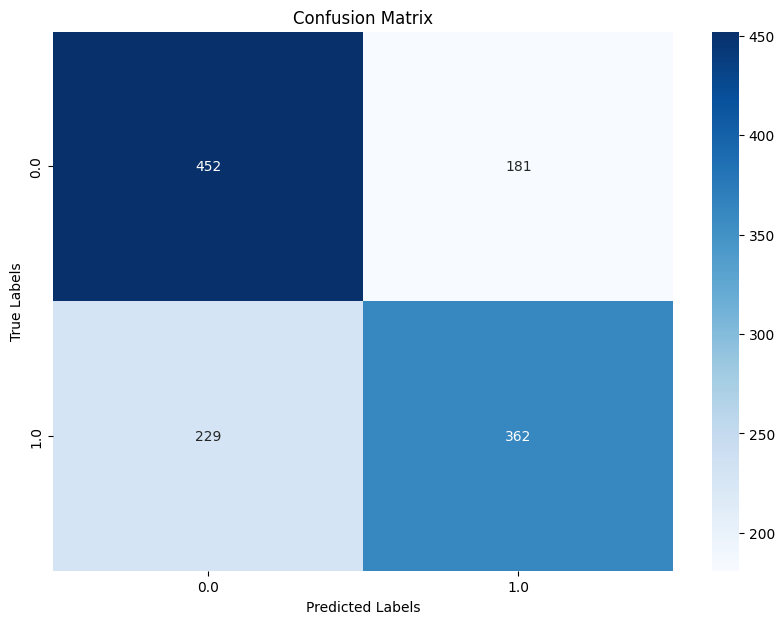

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
# Plot the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_balanced), yticklabels=np.unique(y_balanced))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [21]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=30, random_state=42)


NameError: name 'X' is not defined

                        Feature  Importance
1                       ranking    0.054194
0                        rating    0.017347
5                         stars    0.013589
2                        height    0.010430
6    games_played_rolling_2year    0.007707
7         win_pct_rolling_2year    0.006291
11         side_of_ball_special    0.004847
20       position_group_special    0.004847
13   position_group_d_backfield    0.004248
4                distance_miles    0.003159
3                        weight    0.002424
9          side_of_ball_defense    0.002397
16        position_group_o_line    0.002397
15    position_group_linebacker    0.001688
19  position_group_running_back    0.001144
14        position_group_d_line   -0.000163
10         side_of_ball_offense   -0.001117
18            position_group_qb   -0.001144
17  position_group_pass_catcher   -0.001362
8          side_of_ball_athlete   -0.002533
12       position_group_athlete   -0.002533


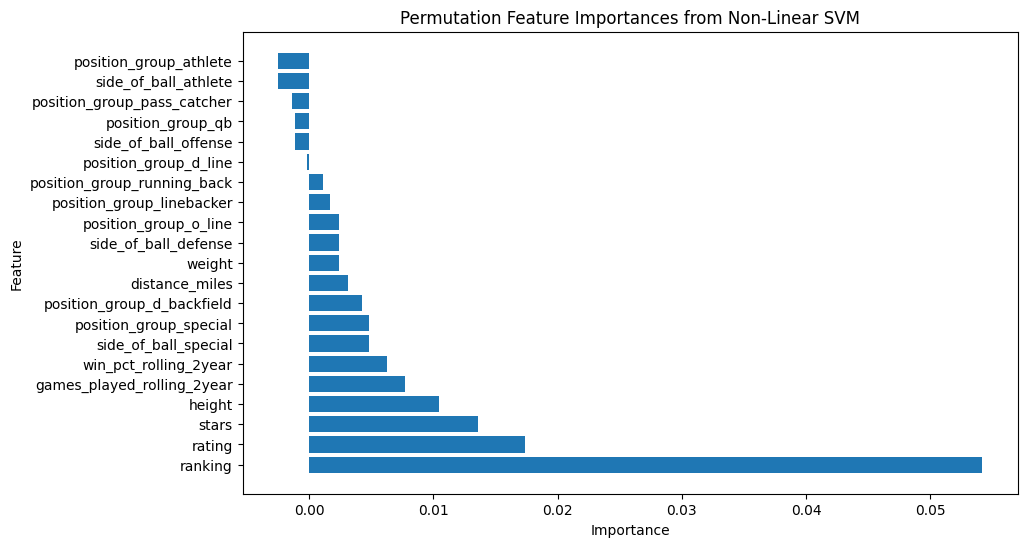

In [22]:

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_balanced.columns, 'Importance': perm_importance.importances_mean})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importances from Non-Linear SVM')
plt.show()